In [ ]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table, join, unique
from   matplotlib.pyplot import figure

In [71]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [72]:
from   schechter         import schechter
from   SV3.define_sample import define_sample
from   ajs_kcorr         import ajs_kcorr
from   ref_gmr           import one_reference_gmr
from   params            import params

In [73]:
version = 0.1

In [74]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,Z,RMAG_DRED,MRH,REFGMR0P1,TARGETID
float64,float64,float64,float64,float64,float64,int64
3.7721402325126423,4.986124929665064,0.33743800813349156,18.87912014731125,-21.60017018500573,0.5029794807690177,0
7.291777572226474,5.216303136427634,0.3358367990279134,19.164485916386255,-21.501643485972103,0.8556049162235593,1
7.271421307032053,5.216813907554459,0.33204277967971185,18.6560738852402,-21.86481444281342,0.6210244102305459,2
7.294683707223873,5.194670649537063,0.3352653718478176,18.923197975657814,-21.416994113457505,0.3562284861943139,3
7.285466104202744,5.2123990016212325,0.3354775369684668,18.197760241964705,-22.500363698331853,0.9118769578721373,4
7.278751592950828,5.213135659398867,0.3395093738207222,19.456602708279306,-21.076593269699252,0.6392363346086005,5
7.385632448576024,5.219834477698842,0.3348199547546389,18.848583906783773,-21.87497619154432,0.9558292991507985,6
7.379988039301598,5.228525331786011,0.3361835673008482,19.387139224724134,-21.37391087548854,1.1065703757197651,7
3.722997589545035,5.043528437008822,0.33876649152353333,18.87975957082224,-21.892940844505468,0.97098179347477,8


In [75]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_derived_v{:.1f}.fits'.format(version))
derived

INSAMPLE,VOLUME,MRH,GMR_DRED,ZMAX,IVMAX,TARGETID
float64,float64,float64,float64,float64,float64,int64
1.0,8512527.859442476,-21.594433657615397,0.02549266328726363,0.4178996799824834,6.534919358634163e-08,0
1.0,8401008.497279251,-21.525309010057327,0.24297213958990116,0.3727779974127923,8.925058222907302e-08,1
1.0,8140318.044465926,-21.85455632047405,0.13457148224825483,0.43692361033919924,5.794024308823048e-08,2
1.0,8361426.049986088,-21.43272392813322,-0.09781357557697246,0.4137158150326175,6.715701594084879e-08,3
1.0,8376109.378948721,-22.52122054272638,0.2686906630994812,0.4773699361403203,4.5701127027884905e-08,4
1.0,8658116.612267835,-21.12981593394758,0.13066040711787885,0.3446052831908925,1.1083189580047984e-07,5
1.0,8330650.856791828,-21.88400062188045,0.3000200560162286,0.40486342162166516,7.122196395146757e-08,6
1.0,8425084.238880066,-21.395906880514506,0.43815489024358145,0.34786748519460664,1.0798161090406571e-07,7
1.0,8605730.072279539,-21.89567897844807,0.30631414730664064,0.405397298284511,7.096711398231258e-08,8


In [76]:
bright_merge_obs = bright_merge_obs[:len(derived)]

In [77]:
isin = derived['INSAMPLE'].astype(bool)

derived = derived[isin]

In [78]:
len(derived), len(bright_merge_obs)

(80502, 80502)

In [79]:
print(np.mean(derived['INSAMPLE']))

1.0


In [80]:
joined = join(derived, unique(bright_merge_obs['TARGETID', 'RMAG_DRED', 'Z', 'RA', 'DEC'], keys='TARGETID', keep='first'), join_type='left', keys='TARGETID')

In [81]:
print(len(derived), len(bright_merge_obs), len(joined))

80502 80502 80502


In [82]:
'''
_ = pl.hist(derived['REF_GMR0P1'], histtype='step', bins=np.arange(-0.2, 1.2, 0.05))

pl.axvline(0.131, c='k', lw=.5)
pl.axvline(1.067, c='k', lw=.5)

pl.xlabel('Ref. $(g-r)$ @ $z=$0.1')
'''

"\n_ = pl.hist(derived['REF_GMR0P1'], histtype='step', bins=np.arange(-0.2, 1.2, 0.05))\n\npl.axvline(0.131, c='k', lw=.5)\npl.axvline(1.067, c='k', lw=.5)\n\npl.xlabel('Ref. $(g-r)$ @ $z=$0.1')\n"

In [83]:
joined['RMAG_IDX'] = np.digitize(joined['MRH'], bins=np.arange(-24.0, -11.0, 2.))

In [84]:
np.sort(joined['RMAG_IDX'].data)

array([1, 1, 1, ..., 4, 4, 4])

Text(0, 0.5, "Counts per $\\Delta V' = 0.05$")

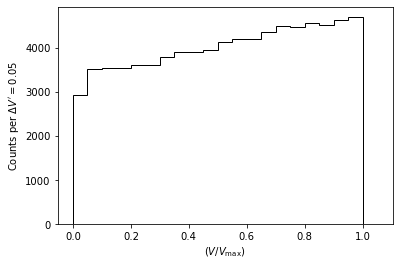

In [85]:
dV = 0.05
_  = pl.hist(derived['VOLUME'] * derived['IVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', color='k')

pl.xlabel(r'$(V / V_{\rm max})$')
pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


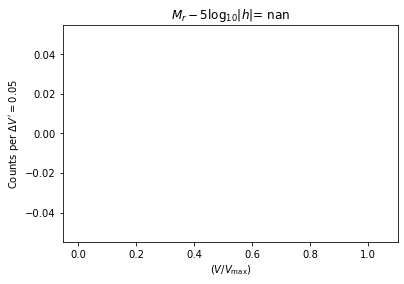

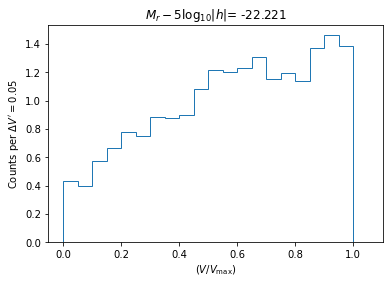

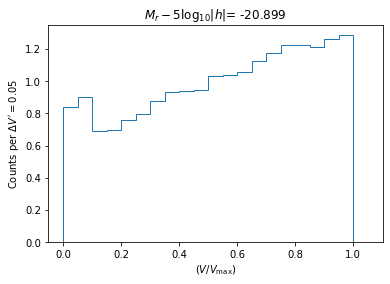

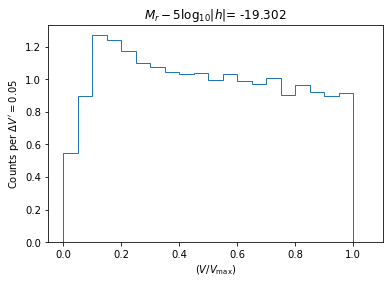

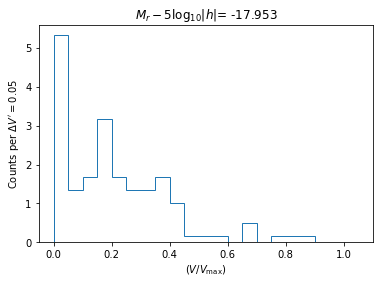

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


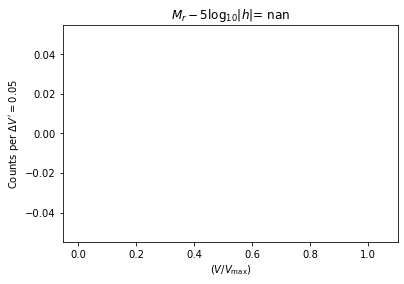

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


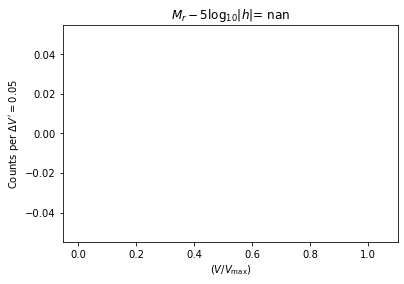

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


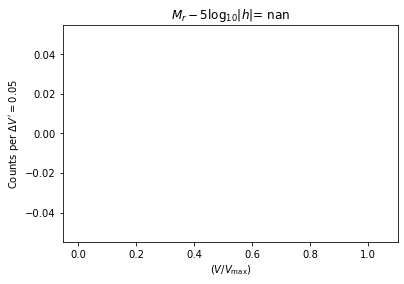

In [86]:
dV = 0.05

for idx in np.arange(0, 8, 1):
    sample  = joined[joined['RMAG_IDX'] == idx]
    _       = pl.hist(sample['VOLUME'] * sample['IVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', density=True)

    med_mrh = np.median(sample['MRH'].data)
    
    title   = r'$M_r - 5 \log_{10}|h|$' + '= {:.3f}'.format(med_mrh)
    
    pl.xlabel(r'$(V / V_{\rm max})$')
    pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

    pl.title(title)
        
    pl.show()

Text(0, 0.5, '(V/VMAX)')

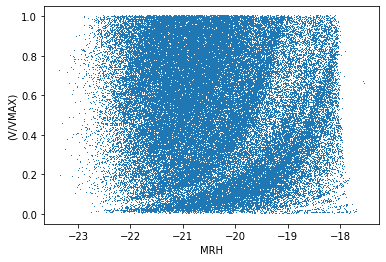

In [94]:
pl.plot(joined['MRH'], joined['VOLUME'] * joined['IVMAX'], marker=',', lw=0.0)

pl.xlabel('MRH')
pl.ylabel('(V/VMAX)')

Text(0, 0.5, '(Z/ZMAX)')

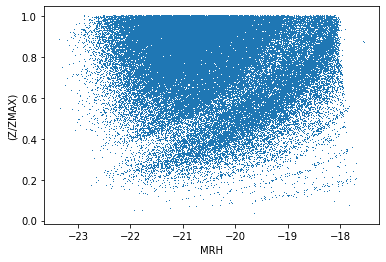

In [95]:
pl.plot(joined['MRH'], joined['Z'] / joined['ZMAX'], marker=',', lw=0.0)

pl.xlabel('MRH')
pl.ylabel('(Z/ZMAX)')

Text(0, 0.5, 'Z')

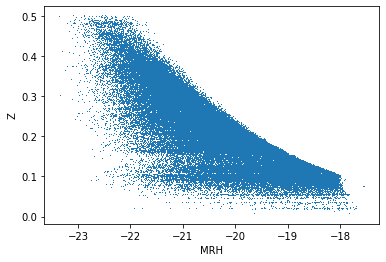

In [93]:
pl.plot(joined['MRH'], joined['Z'], marker=',', lw=0.0)

pl.xlabel('MRH')
pl.ylabel('Z')

# Done.